# Import Dependencies

In [1]:
import sys
assert sys.version_info >= (3, 7)
from packaging import version
import sklearn
assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

# Data Exploration

In [3]:
housing = pd.read_csv('./housing.csv')
housing.head() 

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [6]:
housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

<Axes: ylabel='ocean_proximity'>

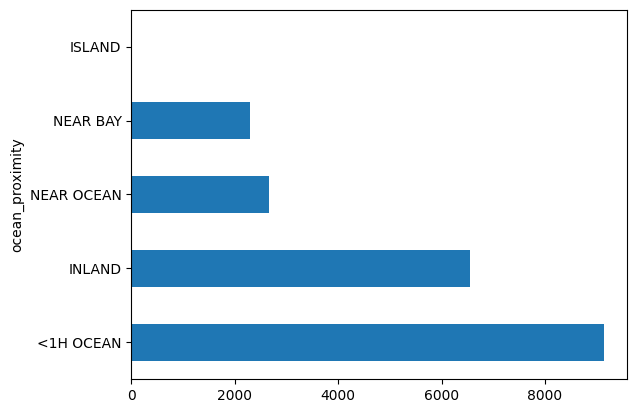

In [7]:
housing["ocean_proximity"].value_counts().plot(kind="barh")

<function matplotlib.pyplot.show(close=None, block=None)>

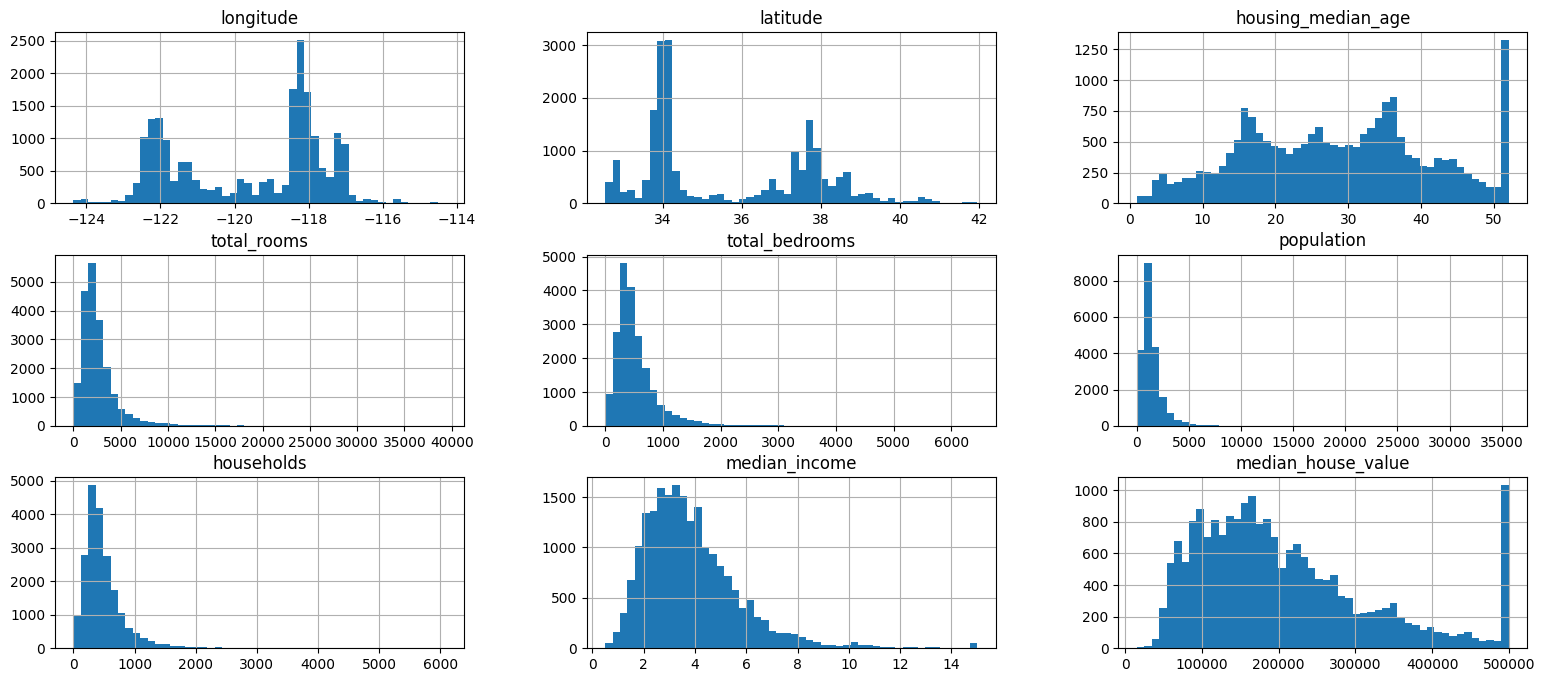

In [8]:
housing.hist(bins=50, figsize=(19,8))
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

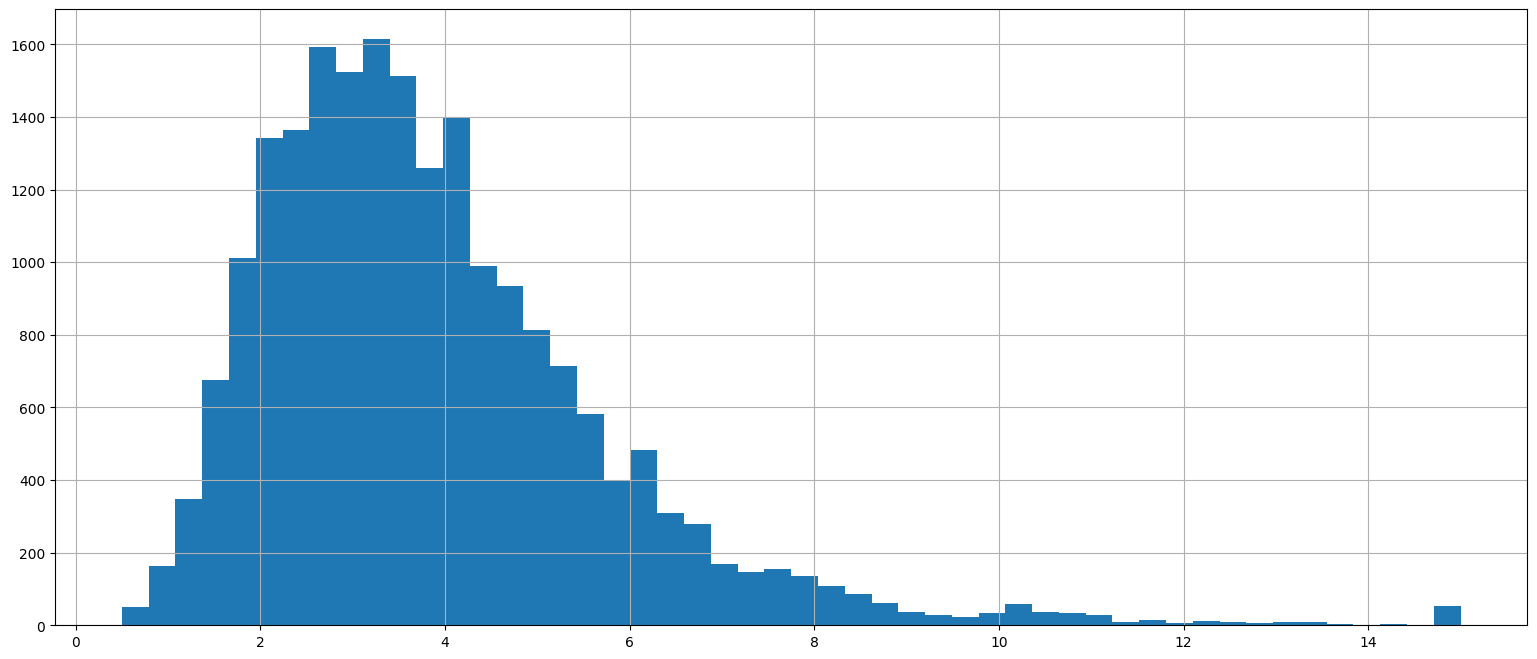

In [9]:
#We were told that the median_income is an important piece of information so we are taking a deeper look at the historgam.
housing["median_income"].hist(bins=50, figsize=(19,8))
plt.show

# Create a Test Set

In [10]:
housing["income_cat"] = pd.cut(housing["median_income"], bins=[0., 1.5, 3.0, 4.5, 6.0, np.inf], labels=[1,2,3,4,5])

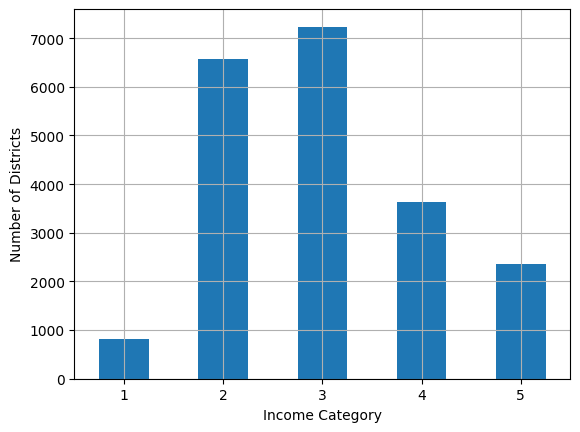

In [11]:
housing["income_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Income Category")
plt.ylabel("Number of Districts")
plt.show()

In [12]:
# Stratified Split - We are applying a stratified splitting technqiue so that when we split the testing an training the model won't be training on a biased set. 
from sklearn.model_selection import StratifiedShuffleSplit 


split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]): 
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index] 

In [13]:
# When we display the newly created strat test data set and raw data set we can see that the outputted number is very similar, therefore we can assert that the distribution between the two sets is very similar. 
# Thus we have successfully implemented a stratified testing set. 
strat_test_set["income_cat"].value_counts() / len(strat_test_set), housing["income_cat"].value_counts() / len(housing)

(income_cat
 3    0.350533
 2    0.318798
 4    0.176357
 5    0.114341
 1    0.039971
 Name: count, dtype: float64,
 income_cat
 3    0.350581
 2    0.318847
 4    0.176308
 5    0.114438
 1    0.039826
 Name: count, dtype: float64)

In [14]:
for set_ in (strat_train_set, strat_test_set): 
    set_.drop("income_cat", axis=1, inplace=True)

# Exploring and Visualize to Gain Insights 

In [15]:
housing = strat_train_set.copy()

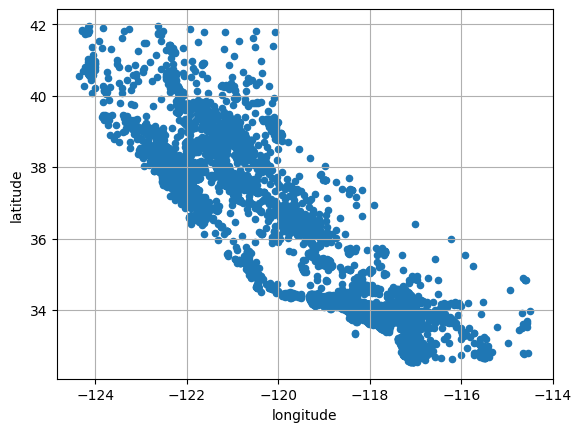

In [16]:

housing.plot(kind="scatter", x="longitude", y="latitude", grid=True)
plt.show()

<Axes: xlabel='longitude', ylabel='latitude'>

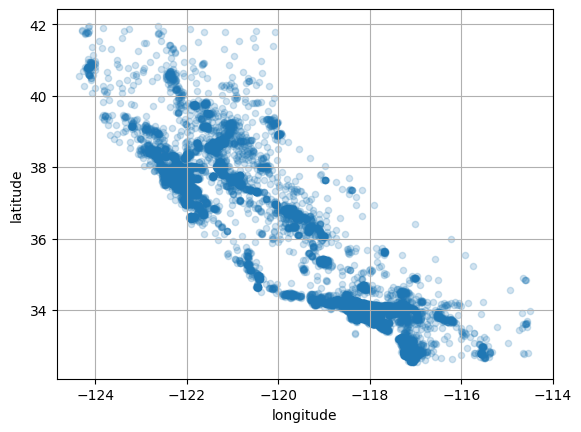

In [17]:
housing.plot(kind="scatter", x="longitude", y='latitude', grid=True, alpha=0.2)

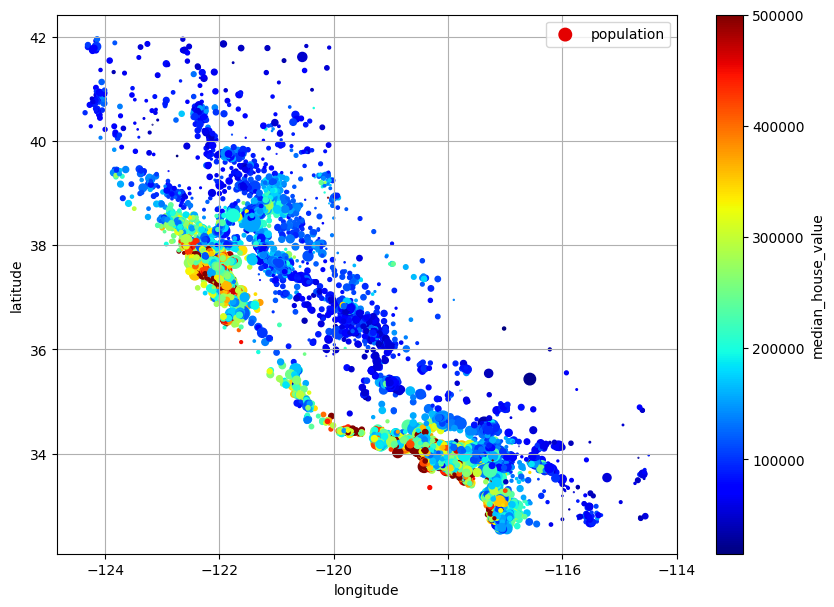

In [18]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True,
             s=housing["population"] / 100, label="population",
             c="median_house_value", cmap="jet", colorbar=True,
             legend=True, sharex=False, figsize=(10, 7))
plt.show()

# Look for Correlations

In [19]:
corr_matrix = housing.corr(numeric_only=True)
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688380
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
longitude            -0.050859
latitude             -0.139584
Name: median_house_value, dtype: float64

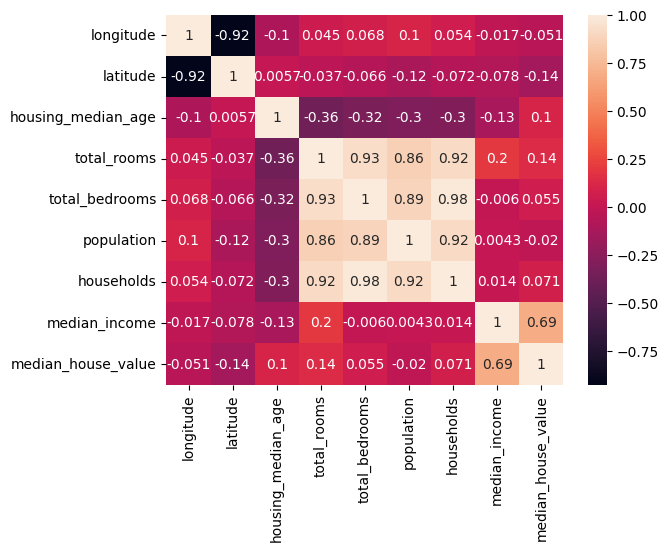

In [20]:
glue = sns.heatmap(corr_matrix, annot=True)

# Feature Engineering

In [21]:
housing["rooms_per_house"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_ratio"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["people_per_house"] = housing["population"] / housing["households"]

In [22]:
corr_matrix = housing.corr(numeric_only=True)
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688380
rooms_per_house       0.143663
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
people_per_house     -0.038224
longitude            -0.050859
latitude             -0.139584
bedrooms_ratio       -0.256397
Name: median_house_value, dtype: float64

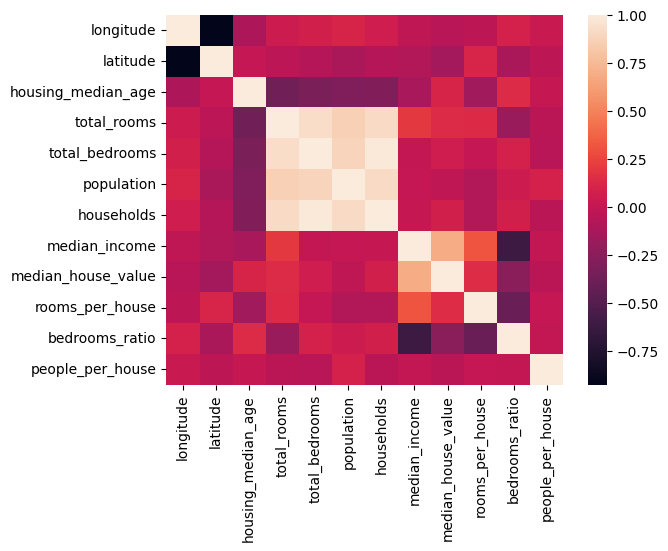

In [23]:
glue = sns.heatmap(corr_matrix, annot=False)

# Preparing the Data for Machine Learning Algorithms
### Data Preparation is sometimes the most time-consuming process. It is also one of the most important asepcts that determines the model accuracy. We would be applying the following transformation to the following data. 

### Feature Engineering: Creating new features (columns) out of our raw data using domain knowledge.  
### Imputation: Inserting values where they might be missing.  
### Encoding Categorical Values: Transforming categorical variables into some numerical variation 
### Scaling: Applying a scaler that transforms all of our data on the same numerical scale

### Clean the Data

In [24]:
housing = strat_test_set.drop("median_house_value", axis=1)
housing_label = strat_test_set['median_house_value'].copy()

In [25]:
from sklearn.impute import SimpleImputer

#To fit a regression model through data, it requires all feature "x" to be present. Instead of dropping the features, we would replace each missing attribute's missing values with median values. 
imputer = SimpleImputer(strategy="median")

In [26]:
# To compute anything numerical, you would need the data to be numerical to begin with. Here we are creating a copy of the data with only the numerical data; excluding the text attribute ocean_proximity.
housing_num = housing.select_dtypes(include=[np.number])
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [33]:
housing_num.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4128 entries, 3905 to 3455
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           4128 non-null   float64
 1   latitude            4128 non-null   float64
 2   housing_median_age  4128 non-null   float64
 3   total_rooms         4128 non-null   float64
 4   total_bedrooms      4089 non-null   float64
 5   population          4128 non-null   float64
 6   households          4128 non-null   float64
 7   median_income       4128 non-null   float64
dtypes: float64(8)
memory usage: 290.2 KB


In [34]:
# Here, we are imputing all missing value X. 
X = imputer.transform(housing_num)

housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)
housing_num.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4128 entries, 3905 to 3455
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           4128 non-null   float64
 1   latitude            4128 non-null   float64
 2   housing_median_age  4128 non-null   float64
 3   total_rooms         4128 non-null   float64
 4   total_bedrooms      4089 non-null   float64
 5   population          4128 non-null   float64
 6   households          4128 non-null   float64
 7   median_income       4128 non-null   float64
dtypes: float64(8)
memory usage: 290.2 KB


### Handling Text and Categorical Attributes

In [37]:
housing_cat = housing[["ocean_proximity"]]
housing_cat

In [40]:
from sklearn.preprocessing import OneHotEncoder

category_encoder = OneHotEncoder() 
housing_cat_encoded = category_encoder.fit_transform(housing_cat)

housing_cat_encoded.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])